In [1]:
import umap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import random

In [2]:
#Récupératoin des fichiers des embeddings npz :
def load_embeddings_npz(npz_path):
  """
  input : nom du fichier npz qui contient les embeddings
  retourne un dictionnaire contenant uniquement les embeddings (npy)
  """
  npz_data = np.load(npz_path)
  return {key: npz_data[key] for key in npz_data.files}

Chargement des données embeddings (par TM-vec) des cyanobactéries "original" et "shuffled"

In [3]:
name_file_original='cyanobact.original.long.prots.npz'
name_file_shuffled='cyanobact.long.prots.shuffled.npz'

embeddings_original = load_embeddings_npz(name_file_original)
embeddings_shuffle = load_embeddings_npz(name_file_shuffled)
#data sous forme de liste :
array_embeddings_original=np.array(embeddings_original['embeddings'])
array_embeddings_shuffle=np.array(embeddings_shuffle['embeddings'])

print(type(embeddings_original))
cles = embeddings_original.keys()
print(cles)

<class 'dict'>
dict_keys(['headers', 'embeddings', 'input_fasta', 'tm_vec_weights', 'protrans_model_path'])


UMAP des données embeddings (par TM-vec) de cyanobactéries "original" et "shuffled"

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


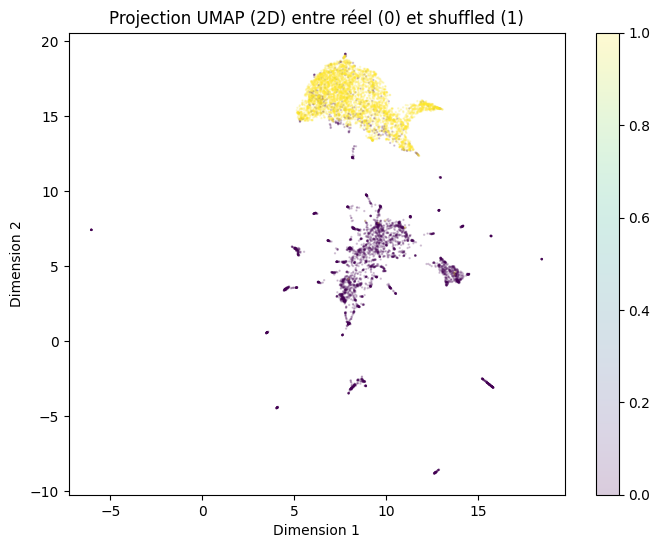

In [4]:
# les jeux de données
data_reel=array_embeddings_original
data_shuffle=array_embeddings_shuffle

#  label arrays
y_reel = np.array([0] * len(data_reel))
y_shuffle = np.array([1] * len(data_shuffle))

# concatenation
X = np.vstack([data_reel, data_shuffle])
y = np.concatenate([y_reel, y_shuffle])

# Standardisation
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

# Affichage 2D : chaque point est coloré selon le label (O si original, 1 si shuffled)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y, alpha=0.2, s=0.5)
plt.colorbar()
plt.title("Projection UMAP (2D) entre réel (0) et shuffled (1)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

UMAP des données embeddings (par TM-vec) de cyanobactéries "original"

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


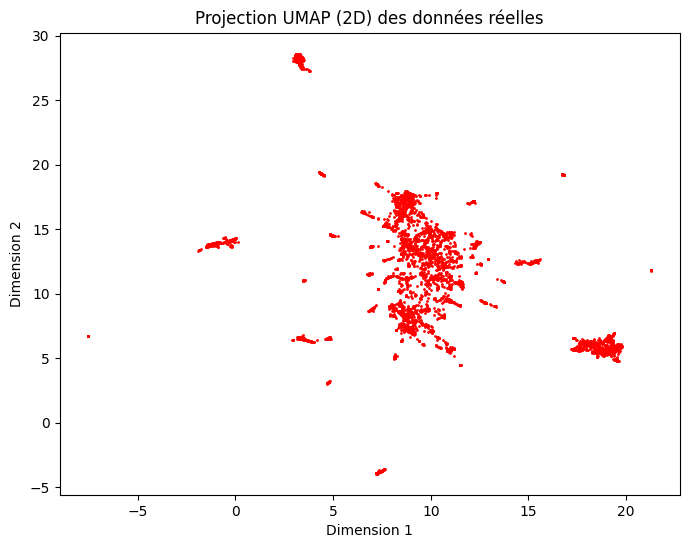

In [5]:
# Charger le jeu de données
data_reel=array_embeddings_original

X = data_reel # Données d'entrée : vecteurs

# Standardisation des données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

# Affichage 2D : chaque point est coloré selon le label (0 à 9)
plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c="red", s=1)
plt.title("Projection UMAP (2D) des données réelles")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

UMAP des données embeddings (par TM-vec) des bactéries issues d'Uniprot (330 000 séquences au total)

327537
32753


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.12/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/usr/local/lib/python3.12/dist-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisati

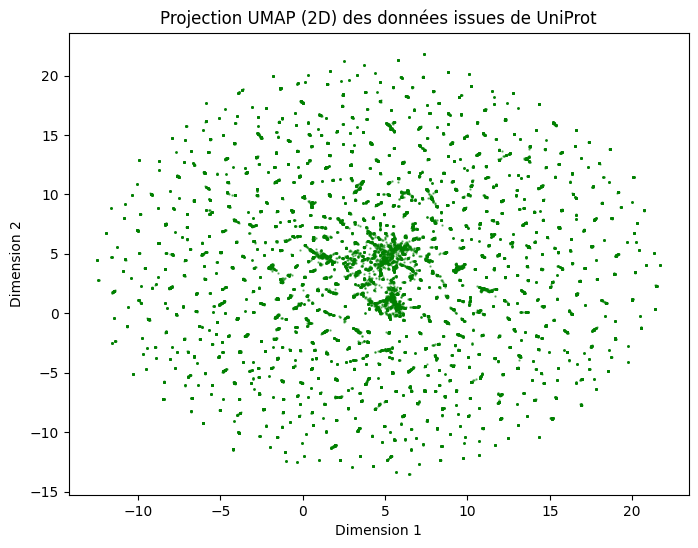

In [7]:
# Charger le jeu de données
name_file_uniprot='big_chunk_0_1_2_combined.npz'
embeddings_uniprot = load_embeddings_npz(name_file_uniprot)
array_embeddings_uniprot=np.array(embeddings_uniprot['embeddings'])

X = array_embeddings_uniprot # Données d'entrée : vecteurs
print(len(X))
# Sélection de 10% aléatoirement car sinon le jeu de données est trop grand pour réaliser un UMAP directement
X = random.choices(X, k=int(len(X)*0.1))
print(len(X))

# Standardisation des données
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Application de l'UMAP pour réduire à 2 dimensions (visualisation plane)
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c="green", alpha=0.5, s=0.5)
plt.title("Projection UMAP (2D) des données issues de UniProt")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

UMAP pour visualiser toutes les données (original, shuffled et uniprot)

In [8]:
data_reel = array_embeddings_original
data_shuffle = array_embeddings_shuffle
data_uniprot = random.choices(array_embeddings_uniprot, k=int(len(X)*0.1))

# Create label arrays
y_reel = np.array(["real"] * len(data_reel))
y_shuffle = np.array(["shuffled"] * len(data_shuffle))
y_uniprot = np.array(["uniprot"] * len(data_uniprot))

# Concatenate all data and labels
X = np.vstack([data_reel, data_shuffle, data_uniprot])
y = np.concatenate([y_reel, y_shuffle, y_uniprot])

# Standardize
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# Apply UMAP
umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_2d = umap_2d.fit_transform(X_standardized)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


limites axe x : -5.797347998619079, 25.486303782463075
limites axe y : -10.753917598724366, 19.883596324920653


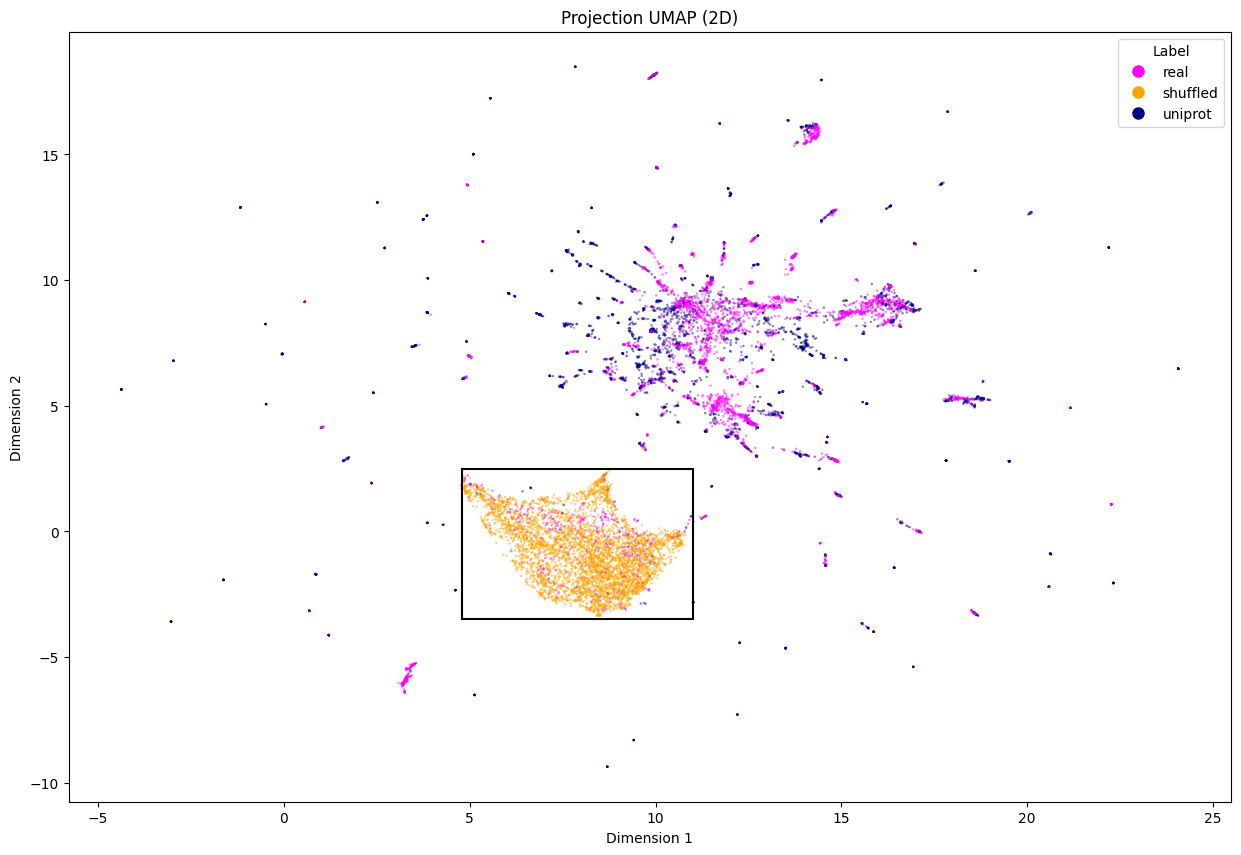

In [12]:
colors={"real": "magenta", "shuffled": "orange", "uniprot": "darkblue"}
alphas={"real":.5, "shuffled": .5, "uniprot":.5}

rng = np.random.default_rng(42)
idx = rng.permutation(len(y))

# color per point
colors_per_point = np.array([colors[label] for label in y])

alpha_per_point = np.array([alphas[label] for label in y])

plt.figure(figsize=(15,10))
plt.scatter(
    X_umap_2d[idx, 0],
    X_umap_2d[idx, 1],
    c=colors_per_point[idx],
    s=3,
    alpha=alpha_per_point[idx],
    linewidths=0,
    rasterized=True
)
from matplotlib.lines import Line2D
plt.title("Projection UMAP (2D)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
legend_handles = [
    Line2D([0], [0], marker='o', color='w',
           markerfacecolor=colors[label], markersize=10, alpha=1.0, label=label)
    for label in sorted(np.unique(y))
]
plt.legend(handles=legend_handles, title="Label", loc='upper right', frameon=True)

# Délimitation de la zone comportant les protéines shuffled (qui sont bien réunis au même endroit)
xmin, xmax = plt.xlim()
print(f"limites axe x : {xmin}, {xmax}")
ymin, ymax = plt.ylim()
print(f"limites axe y : {ymin}, {ymax}")

#Limite de la zone contenant les protéines shuffled à définir :
lim_min_x = 4.8
lim_max_x = 11
lim_min_y = -3.5
lim_max_y = 2.5

plt.axvline(x=lim_min_x, color="k", ymin=(lim_min_y-(ymin))/(ymax-ymin), ymax=(lim_max_y-(ymin))/(ymax-ymin))
plt.axvline(x=lim_max_x, color="k", ymin=(lim_min_y-(ymin))/(ymax-ymin), ymax=(lim_max_y-(ymin))/(ymax-ymin))
plt.axhline(y=lim_min_y, color="k", xmin=(lim_min_x-(xmin))/(xmax-xmin), xmax=(lim_max_x-(xmin))/(xmax-xmin))
plt.axhline(y=lim_max_y, color="k", xmin=(lim_min_x-(xmin))/(xmax-xmin), xmax=(lim_max_x-(xmin))/(xmax-xmin))

#Sauvegarde de l'umap final
plt.savefig('umap.png', dpi=1600)
plt.show()

Analyse des séquences Uniprot qui sont mappées avec les séquences shuffled

In [18]:
def proteines_mappees_avec_shuffled(dictionnaire_prot, cat_prot) :
  """
  dictionnaire_prot : dictionnaire comportant les séquences : embeddings_original, embeddings_shuffle ou embeddings_uniprot
  cat_prot : 'originale', 'shuffle' ou 'uniprot'
  retourne la liste des headers des séquences situées dans la zone délimitée contenant la majorité des séquences shuffled
  """
  liste_headers=[] # liste contenant les headers des protéines (de uniprot si uniprot choisi) qui se superposent avec les embeddings shuffle dans le UMAP
  indice_h=0 # indice des protéines dans le dictionnaire embeddings
  if cat_prot == 'originale' :
    i_min = 0
    i_max = len(dictionnaire_prot['headers'])
  if cat_prot == 'shuffled' :
    i_min = len(embeddings_original['headers'])
    i_max = len(embeddings_original['headers']) + len(dictionnaire_prot['headers'])
  if cat_prot == 'uniprot' :
    i_min = len(X_umap_2d) - len(dictionnaire_prot["headers"])
    i_max = len(X_umap_2d)
  for coord in X_umap_2d[i_min : i_max-1] :
    indice_h+=1
    if coord[0]>lim_min_x and coord[0]<lim_max_x and coord[1]>lim_min_y and coord[1]<lim_max_y:
      header=np.array(dictionnaire_prot['headers'][indice_h])
      liste_headers.append(header)
  return(liste_headers)

In [19]:
uniprot_headers=proteines_mappees_avec_shuffled(embeddings_uniprot, 'uniprot')
print(len(uniprot_headers)) # on retrouve 4594 protéines issues de uniprot qui se retrouvent mappées avec les embeddings des shuffled par umap

shuffle_headers=proteines_mappees_avec_shuffled(embeddings_shuffle, 'shuffled')
print(len(shuffle_headers)) # 4192 protéines du shuffled qui sont regroupées au même endroit sur environ 4000

original_headers=proteines_mappees_avec_shuffled(embeddings_original, 'originale')
print(len(original_headers)) # 369 protéines des données réelles qui sont regroupées dans la même zone que celles du shuffled sur environ 4000

4594
4192
369


In [20]:
print(uniprot_headers)

[array('sp|P86897|GTF4_LEUME', dtype='<U20'), array('sp|P83146|ASL1_BACSE', dtype='<U20'), array('sp|P83708|ODO2_DELAC', dtype='<U20'), array('sp|P83878|LICA_BACIU', dtype='<U20'), array('sp|P83879|LICB_BACIU', dtype='<U20'), array('sp|P85143|NAAA_LYSSP', dtype='<U20'), array('sp|B3EWP7|LIN50_BACLI', dtype='<U21'), array('sp|P83000|GSTE2_PSEUO', dtype='<U21'), array('sp|P36503|DURC_STRGP', dtype='<U20'), array('sp|Q9R4Y1|HVOR_PROHU', dtype='<U20'), array('sp|P85152|LYS1_LYSSX', dtype='<U20'), array('sp|A6T4E1|LPT_KLEP7', dtype='<U19'), array('sp|P21778|PFKA2_THET8', dtype='<U21'), array('sp|P82680|GLMK_SEGBR', dtype='<U20'), array('sp|C0HJC0|PLNKY_LACPN', dtype='<U21'), array('sp|P81185|PCCA_MYXXA', dtype='<U20'), array('sp|A2BVK2|PSAM_PROM5', dtype='<U20'), array('sp|A5GJH8|PSAM_SYNPW', dtype='<U20'), array('sp|P55793|GRDB_GOTPU', dtype='<U20'), array('sp|A0JZ52|RL361_ARTS2', dtype='<U21'), array('sp|A1KB05|RL36_AZOSB', dtype='<U20'), array('sp|A1SXW4|RL36_PSYIN', dtype='<U20'), array

In [21]:
header_uni = embeddings_uniprot['headers']
print(f"Nombre de protéines totale issues de Uniprot : {len(header_uni)}")

organism_list = {} # dictionnaire des organismes présents dans les données uniprot et le nombre de protéines correspondant
for h in header_uni :
  l_header=h.split("|")
  organism=l_header[2].split("_")[1]
  if organism not in organism_list :
    organism_list[organism]=1
  else :
    organism_list[organism]+=1

print(f"Nombre d'organismes différents dans les protéines issues de Uniprot : {len(organism_list)}")
print(f"Nombre de protéines issues de l'organisme PROM5 : {organism_list['PROM5']}") # 298 dont 4 mélangées au shuffle


fonction_list = {} # dictionnaire des fonctions référencées dans les données uniprot et le nombre de protéines correspondant
for h in header_uni :
  l_header=h.split("|")
  fct=l_header[2].split("_")[0]
  if fct not in fonction_list :
    fonction_list[fct]=1
  else :
    fonction_list[fct]+=1

print(f"Nombre de fonctions totales dans les protéines de uniprot : {len(fonction_list)}")
print(f"Nombre de protéines associées à la fonction RS16 : {fonction_list['RS16']}")

Nombre de protéines totale issues de Uniprot : 327537
Nombre d'organismes différents dans les protéines issues de Uniprot : 3309
Nombre de protéines issues de l'organisme PROM5 : 297
Nombre de fonctions totales dans les protéines de uniprot : 21839
Nombre de protéines associées à la fonction RS16 : 774
